# Basic Root Locus Design

## Topic 11 - RL design

In [1]:
import requests as req, os

URL = "https://raw.githubusercontent.com/mit-acl/16_06_Class/main/"
File = ["basic_material.py","control_materials.py"]

if not os.path.isfile(File[0]):
    print('Basic files not found - downloading them')
    for dfile in File:
        if not os.path.isfile(dfile):
            print("Downloading "+dfile)
            res = req.get(URL+dfile)
            file = open(dfile, 'w')
            file.write(res.text)
            file.close()

print('Basic file found')
%run basic_material.py

from control.matlab import tf, rlocus, step, feedback, lsim, bode
from control import pade

from control_materials import *

Basic file found
Running Python: 3.8.19
Running Sympy: 1.12.1
Control Package Found


## Analyze impact of adding Integrator


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 0.385
At possible locations s = -0.423


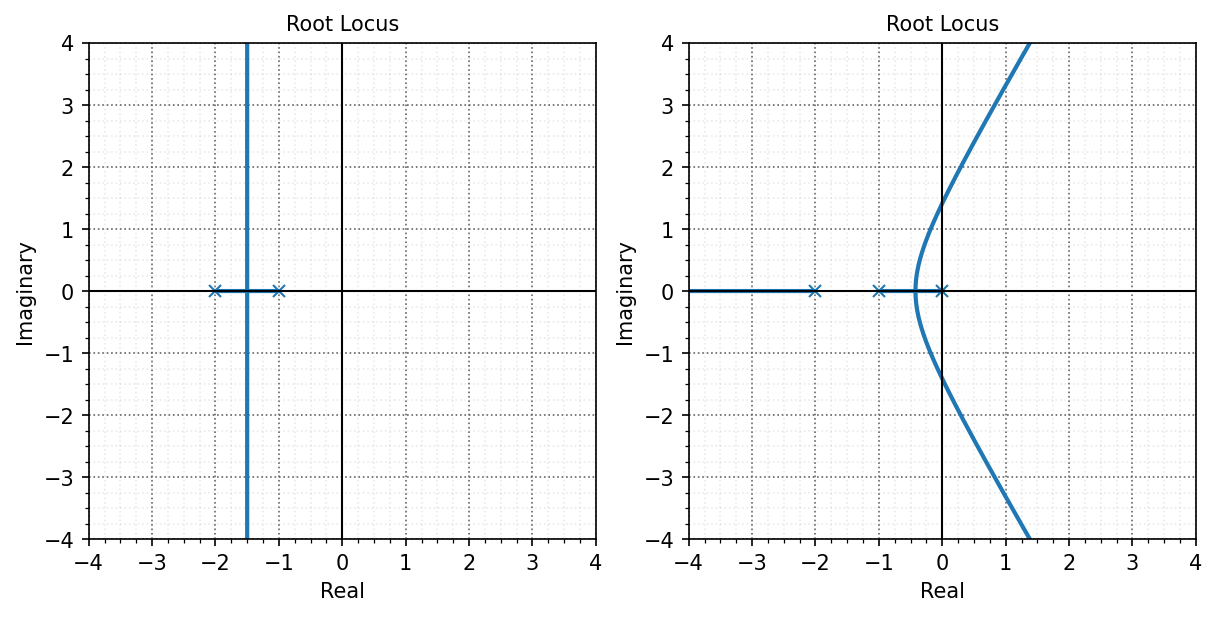

In [2]:
G0 = tf(1, (1,3,2))

# pole to the left
G1 = G0*tf((0, 1), (1, 0))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0),  grid=False,ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])

rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist),  grid=False,ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
savefig("./figs/L12_1.pdf", dpi=600)
plt.show()

## Analyze impact of adding PI


Found breakin/out at K = 0.250
At possible locations s = -1.500

Found breakin/out at K = 0.151
At possible locations s = -0.468


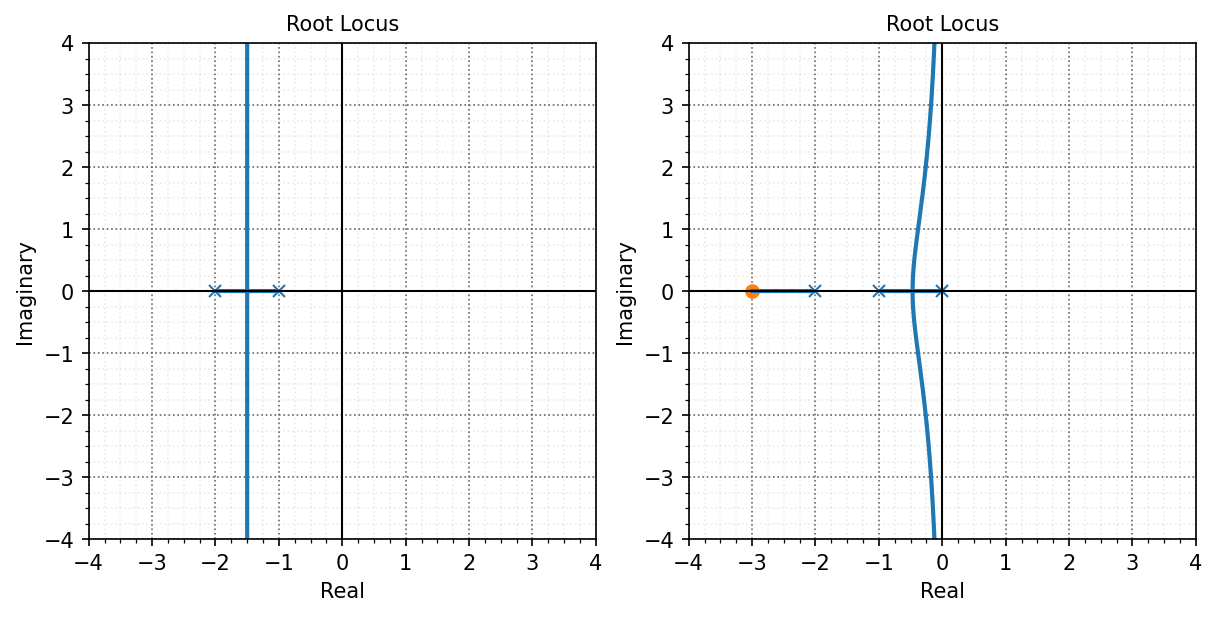

In [3]:
G1 = G0*tf((1, 3), (1, 0))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0),  grid=False,ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])

rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist),  grid=False,ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
savefig("./figs/L12_2.pdf", dpi=600)
plt.show()

## Analyze impact of adding D


Found breakin/out at K = 0.250
At possible locations s = 1.500

Found breakin/out at K = 5.828
At possible locations s = -1.414

Found breakin/out at K = 0.172
At possible locations s = 1.414


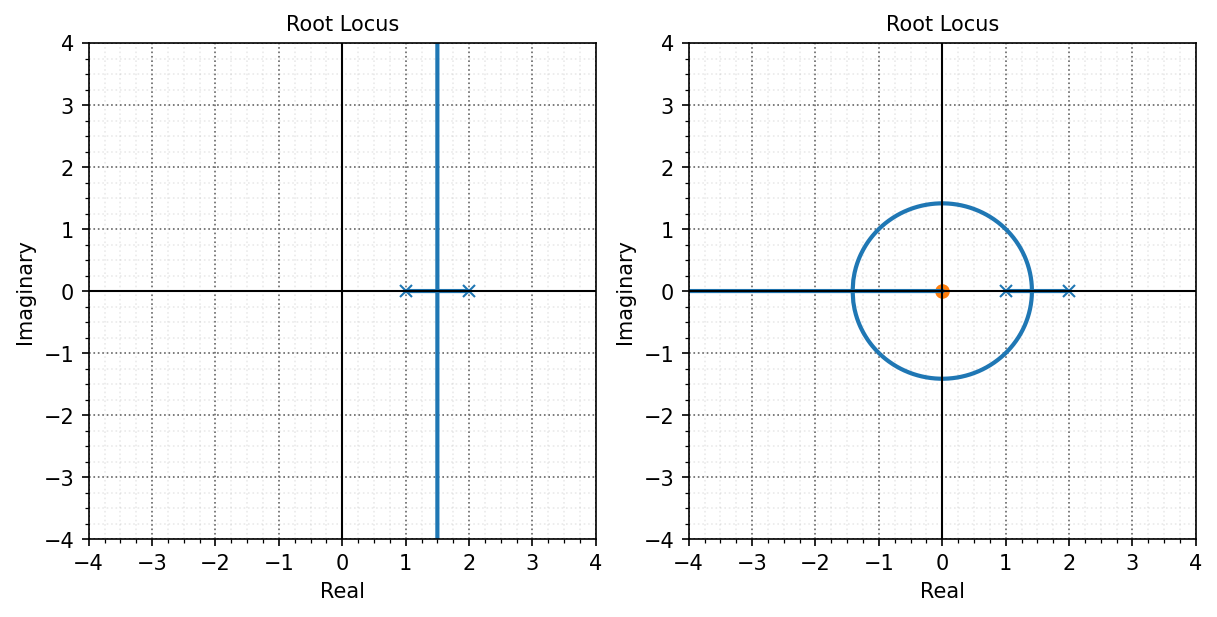

In [4]:
G0 = tf(1, (1,-3,2))
G1 = G0*tf((1, 0), (1))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0),  grid=False,ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])

rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist),  grid=False,ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
savefig("./figs/L12_3.pdf", dpi=600)
plt.show()

## Analyze impact of adding PD


Found breakin/out at K = 0.250
At possible locations s = 1.500

Found breakin/out at K = 9.899
At possible locations s = -3.449

Found breakin/out at K = 0.101
At possible locations s = 1.449


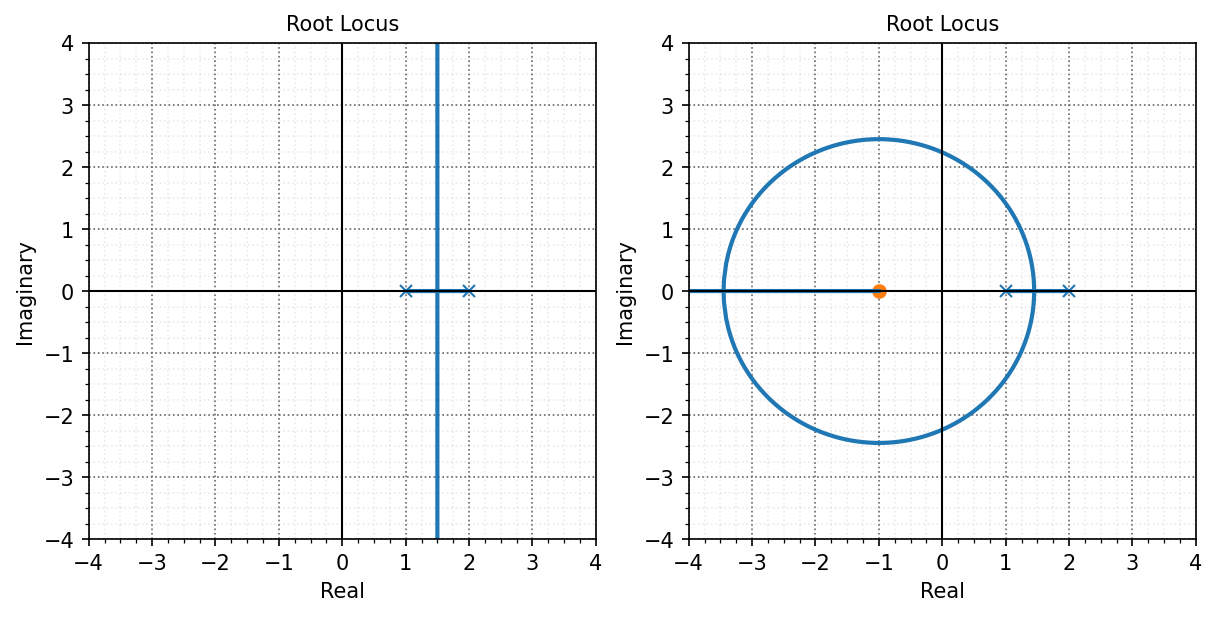

In [5]:
G0 = tf(1, (1,-3,2))
G1 = G0*tf((1, 1), (1))

fig, ax = plt.subplots(1,2,figsize=(8, 4),dpi=150,constrained_layout = True)
rlist, klist = rlocus(G0, kvect=Root_Locus_gains(G0),  grid=False,ax=ax[0])
ax[0].set_xlim([-4, 4]);ax[0].set_ylim([-4, 4])
nicegrid(ax[0])

rlist, klist = rlocus(G1, kvect=Root_Locus_gains(G1,Krange=klist),  grid=False,ax=ax[1])
ax[1].set_xlim([-4, 4]);ax[1].set_ylim([-4, 4])
nicegrid(ax[1])
savefig("./figs/L12_4.pdf", dpi=600)
plt.show()

## Use filter to avoid high frequency issue with PD

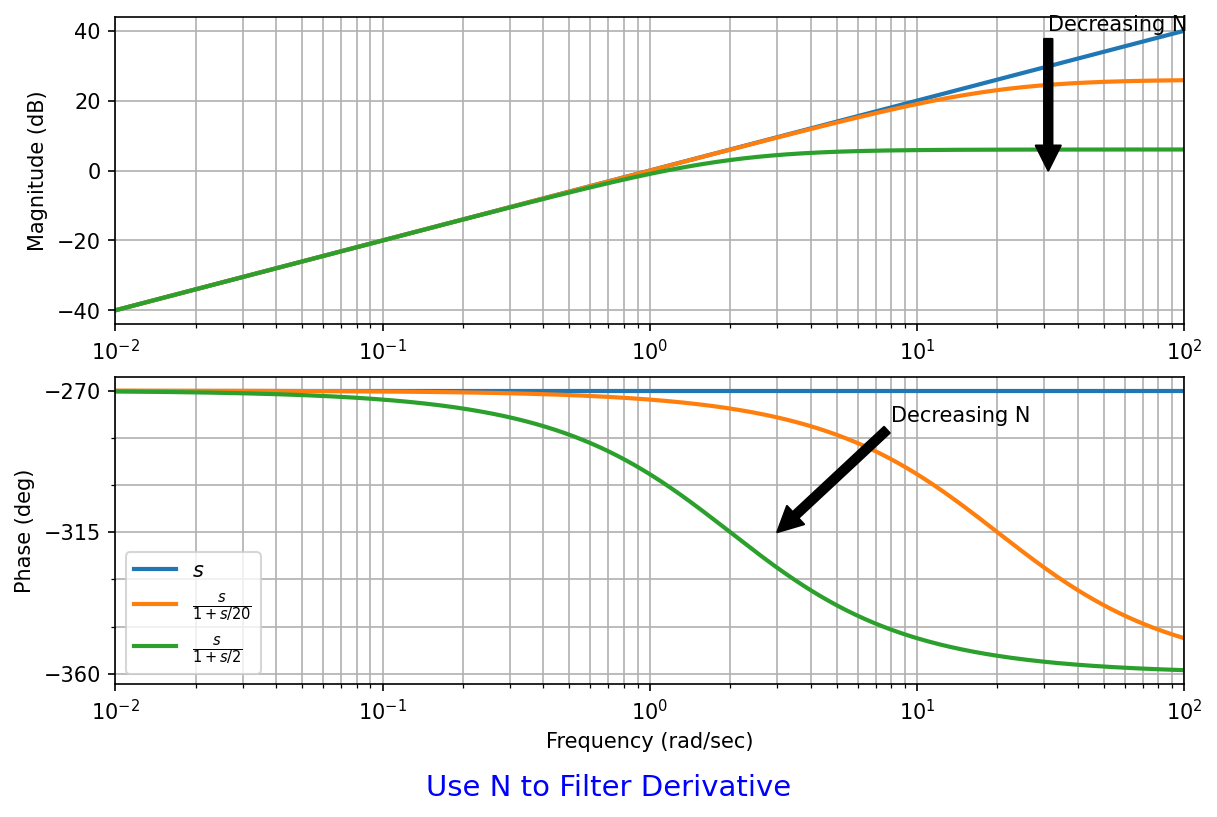

In [6]:
w = np.logspace(-2, 2, 1000)
G_deriv = tf((1,0), (0,1))
G_deriv_2 = tf((1,0), (1/2,1))
G_deriv_20 = tf((1,0), (1/20,1))
fig, ax = plt.subplots(1,2,figsize=(8, 5),dpi=150,constrained_layout = True)
Gfreq = bode(G_deriv,w,plot=True)
Gfreq20 = bode(G_deriv_20,w,plot=True)
Gfreq2 = bode(G_deriv_2,w,plot=True)
ax1,ax2 = plt.gcf().axes

ax2.legend((r'$s$',r'$\frac{s}{1+s/20}$',r'$\frac{s}{1+s/2}$'))
ax1.annotate('Decreasing N', xy=(31, 0), xytext=(31, 40), 
            arrowprops=dict(facecolor='black', shrink=0.),
            )
ax2.annotate('Decreasing N', xy=(3, -315), xytext=(8, -280), 
            arrowprops=dict(facecolor='black', shrink=0.),
            )
caption("Use N to Filter Derivative",fig)
savefig("./figs/L12_5.pdf", dpi=600)
